In [1]:
from typing import Dict, List, Tuple
import torch
from torch.utils.data import DataLoader
from torch import nn
from torch.utils.tensorboard import SummaryWriter
from tqdm.auto import tqdm
from datetime import datetime
from utils.engine import train_func, test_func
from utils.engine import set_seed
import torchvision
import torchinfo
import torchvision.transforms as transforms
from torchsummary import summary

In [1]:
pip install git+https://github.com/shijianjian/EfficientNet-PyTorch-3D

  Cloning https://github.com/shijianjian/EfficientNet-PyTorch-3D to /tmp/pip-req-build-m1nq3w9j
  Running command git clone --filter=blob:none --quiet https://github.com/shijianjian/EfficientNet-PyTorch-3D /tmp/pip-req-build-m1nq3w9j
  Resolved https://github.com/shijianjian/EfficientNet-PyTorch-3D to commit c13e36455573a55dea2ae4d5d09c85e01e654a7d
  Preparing metadata (setup.py) ... done
  Created wheel for efficientnet_pytorch_3d: filename=efficientnet_pytorch_3d-0.6.3-py3-none-any.whl size=16746 sha256=e0c2f35f9b82a99d066bead56c0e638b5685a8c53add420121a371c1f37d7006
  Stored in directory: /tmp/pip-ephem-wheel-cache-8qaorkt8/wheels/01/7c/5f/e607745cd740be61db99d5ab232d700c1270d34220bf309e03
Successfully built efficientnet_pytorch_3d
Note: you may need to restart the kernel to use updated packages.


In [2]:
from efficientnet_pytorch_3d import EfficientNet3D

In [3]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [4]:
model = EfficientNet3D.from_name("efficientnet-b0", override_params={'num_classes': 2}, in_channels=1)

from torchsummary import summary
#summary(model, input_size=(1, 200, 200, 200))

model = model.cuda()
# inputs = torch.randn((1, 1, 200, 200, 200)).cuda()
# labels = torch.tensor([0]).cuda()
# # test forward
# num_classes = 2

# criterion = torch.nn.CrossEntropyLoss()
# optimizer = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

# model.train()
# for epoch in range(2):
#     # zero the parameter gradients
#     optimizer.zero_grad()

#     # forward + backward + optimize
#     outputs = model(inputs)
#     loss = criterion(outputs, labels)
#     loss.backward()
#     optimizer.step()

#     # print statistics
#     print('[%d] loss: %.3f' % (epoch + 1, loss.item()))

# print('Finished Training')

In [5]:
from utils.data_load import load_data
train_dataloader, test_dataloader = load_data("output/", 1 
                                              ,#transform=transform
                                              )

In [38]:
import torch
import torch.nn.functional as F

# Assuming your tensor is called 'input_tensor'
input_tensor = torch.randn(1, 91, 106, 91)

# Pad the tensor to the new size
padded_tensor = F.pad(input_tensor, (54, 55, 47, 47, 54, 55))  # (padding for each dimension: (begin, end))
print(padded_tensor.shape)  # Should print: torch.Size([1, 200, 200, 200])


torch.Size([1, 200, 200, 200])


In [15]:


# Example input tensor
input_tensor = torch.randn(1, 91, 106, 91)

# Resize to match the desired shape
resized_tensor = F.interpolate(input_tensor, size=(91, 91), mode='bilinear', align_corners=False)
print(resized_tensor.shape)  # torch.Size([1, 91, 91, 91])

torch.Size([1, 91, 91, 91])


In [6]:
img, label = next(iter(train_dataloader))
img.shape, label.shape

(torch.Size([1, 1, 200, 203, 200]), torch.Size([1]))

In [11]:
inputs.shape

torch.Size([1, 1, 91, 91, 91])

In [7]:
import torch.nn.functional as F
#inputs = F.interpolate(img, size=(200, 200, 200), mode='trilinear', align_corners=False).to(device)
inputs = img.to(device)
labels = label.to(device)
# test forward
num_classes = 2

criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

model.train()
for epoch in range(2):
    # zero the parameter gradients
    optimizer.zero_grad()

    # forward + backward + optimize
    outputs = model(inputs)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()

        # print statistics
    print('[%d] loss: %.3f' % (epoch + 1, loss.item()))

print('Finished Training')

[1] loss: 0.662
[2] loss: 0.653
Finished Training


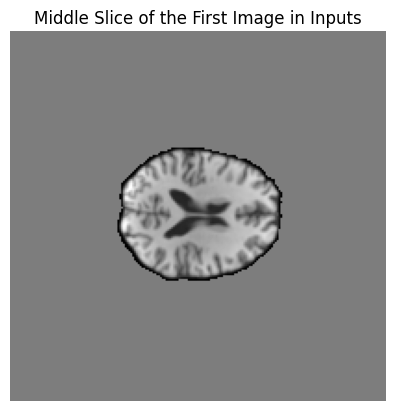

In [13]:
import matplotlib.pyplot as plt

# Select the first image from the inputs tensor
image = inputs[0, :, :, :, 100].cpu().numpy()

# Plot the image
plt.imshow(image[image.shape[0] // 2], cmap='gray')
plt.title('Middle Slice of the First Image in Inputs')
plt.axis('off')
plt.show()

In [26]:
torchinfo.summary(model, input_data=img.to(device))

Layer (type:depth-idx)                             Output Shape              Param #
EfficientNet3D                                     [1, 2]                    --
├─Conv3dStaticSamePadding: 1-1                     [1, 32, 45, 54, 45]       864
│    └─ZeroPad2d: 2-1                              [1, 1, 92, 110, 92]       --
├─BatchNorm3d: 1-2                                 [1, 32, 45, 54, 45]       64
├─MemoryEfficientSwish: 1-3                        [1, 32, 45, 54, 45]       --
├─ModuleList: 1-4                                  --                        --
│    └─MBConvBlock3D: 2-2                          [1, 16, 22, 27, 22]       --
│    │    └─Conv3dStaticSamePadding: 3-1           [1, 32, 22, 27, 22]       864
│    │    └─BatchNorm3d: 3-2                       [1, 32, 22, 27, 22]       64
│    │    └─MemoryEfficientSwish: 3-3              [1, 32, 22, 27, 22]       --
│    │    └─Conv3dStaticSamePadding: 3-4           [1, 8, 1, 1, 1]           264
│    │    └─MemoryEfficientSwish

In [11]:
with torch.inference_mode():
    logit = model(img.cuda())
    pred = torch.softmax(logit, dim=1).argmax(dim=1)

In [12]:
pred

tensor([0, 0], device='cuda:0')

In [8]:
class ResizeAndSelectDimension:
    def __init__(self, output_size, dimension=0):
        self.output_size = output_size
        self.dimension = dimension

    def __call__(self, sample):
        image = sample
        # Redimensionar la imagen 3D
        image = torch.nn.functional.interpolate(image.unsqueeze(0), size=self.output_size, mode='trilinear', align_corners=False)
        image = image.squeeze(0)
        # Seleccionar una dimensión (por ejemplo, la primera)
        image = image[self.dimension, :, :]
        return image

In [14]:
from utils.data_load import load_data

transform = transforms.Compose([
    ResizeAndSelectDimension(output_size=(224,224,224), dimension=0)
])

train_dataloader, test_dataloader = load_data("output/", 2 
                                              ,#transform=transform
                                              )

In [35]:
img, label = next(iter(train_dataloader))
img.shape, label.shape

(torch.Size([2, 1, 91, 109, 91]), torch.Size([2]))

In [2]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [7]:
OUT_FEATURES = 2

def create_effntb0():
    weights = torchvision.models.EfficientNet_B0_Weights.DEFAULT
    model = torchvision.models.efficientnet_b0(weights=weights).to(device)
    for param in model.features.parameters():
        param.requires_grad = False

    set_seed()

    model.classifier = torch.nn.Sequential(
        torch.nn.Dropout(p=0.2, inplace=True), #We dont change this variable
        torch.nn.Linear(in_features=1280, out_features=OUT_FEATURES, bias=True)
    ).to(device)
    print(f"[INFO] create new effntb0 model.")
    return model

In [8]:
model_effntb0 = create_effntb0()

[INFO] create new effntb0 model.


In [12]:
torchinfo.summary(model_effntb0,(32, 3, 224, 224), col_names=["num_params","trainable"]
                  ,row_settings=["var_names"])

Layer (type (var_name))                                      Param #                   Trainable
EfficientNet (EfficientNet)                                  --                        Partial
├─Sequential (features)                                      --                        False
│    └─Conv2dNormActivation (0)                              --                        False
│    │    └─Conv2d (0)                                       (864)                     False
│    │    └─BatchNorm2d (1)                                  (64)                      False
│    │    └─SiLU (2)                                         --                        --
│    └─Sequential (1)                                        --                        False
│    │    └─MBConv (0)                                       (1,448)                   False
│    └─Sequential (2)                                        --                        False
│    │    └─MBConv (0)                                       (6,004

In [ ]:
set_seed()
model_0 = TinyVGG(input_shape=1, hidden_units=64, output_shape=2).to(device)

with torch.inference_mode():
    logit = model_0(img.to(device))
    pred = torch.softmax(logit, dim=1).argmax(dim=1)

pred